<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/6%EC%A3%BC%EC%B0%A8/neural_network_basic_concrete_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망 학습

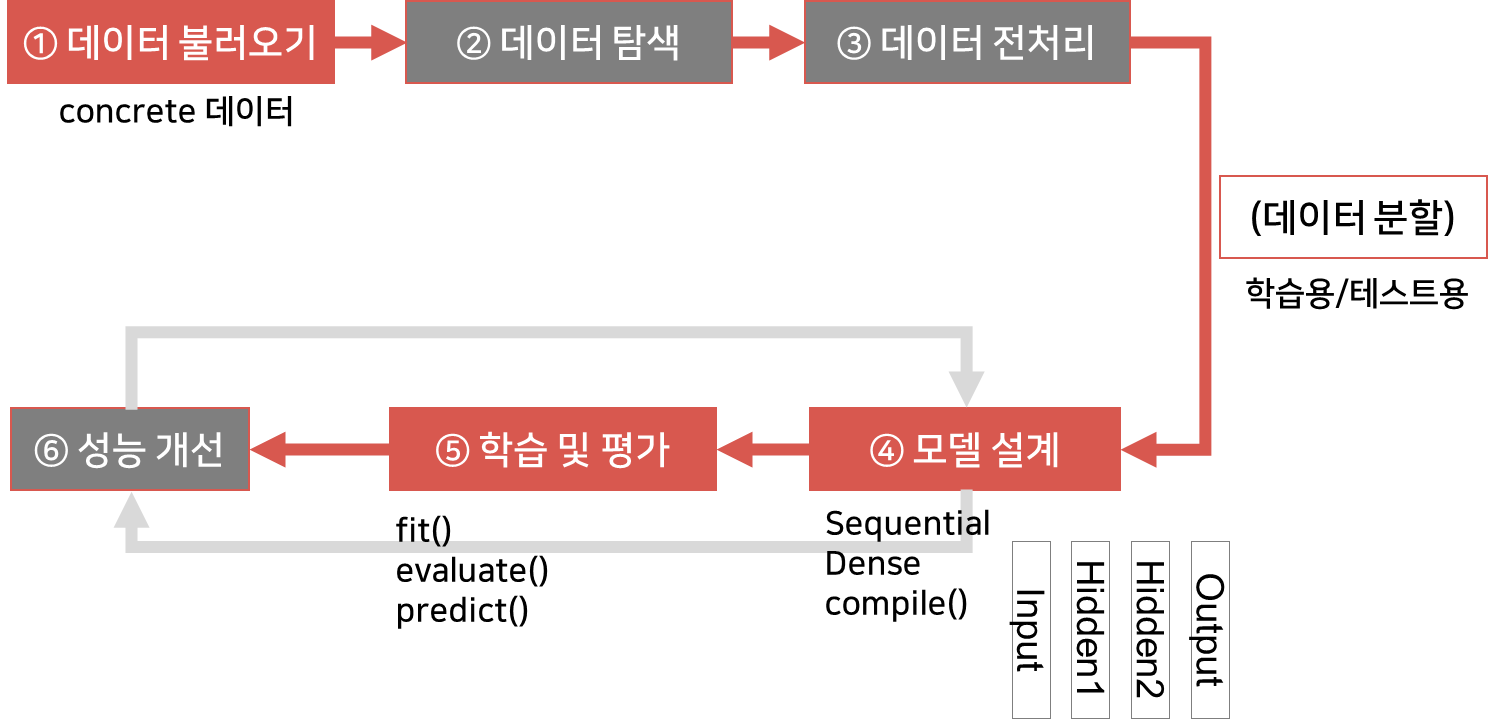

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/zzhining/python_ml_dl/main/dataset/concrete.csv')
df.shape

(1030, 9)

In [2]:
df.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## 데이터 분할

In [4]:
from sklearn.model_selection import train_test_split

# 데이터분할
y = df['CompressiveStrength']
X = df.drop(['CompressiveStrength'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
X_train.shape, X_test.shape

((772, 8), (258, 8))

In [6]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


##신경망 구성
- 레이어 : Input(8), Hidden, Output(1)
- 활성화함수: Hidden(Lelu), Output(Lelu)
- 손실함수: mse
- 옵티마이저: adam


## 모델 설계 및 학습

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델의 설정
model = Sequential()
# 입력 노드: 8
# 은닉층 1 노드 16, relu
# 은닉층 2 노드 8, relu
# 은닉층 3 노드 1, relu
model.add(Dense(16, input_dim= X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

# 모델 컴파일
model.compile(loss='mse',
            optimizer='adam',
            metrics=['mse'])

# 모델 실행
history = model.fit(X_train, y_train, 
                    validation_split=0.2,  #학습용 데이터의 20프로를 검증용으로 설정
                    epochs=50, batch_size=64)

Epoch 1/50
10/10 [==============================] - 6s 24ms/step - loss: 29772.2109 - mse: 29772.2109 - val_loss: 15952.1631 - val_mse: 15952.1631
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 9100.8496 - mse: 9100.8496 - val_loss: 2443.8860 - val_mse: 2443.8860
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 1402.1469 - mse: 1402.1469 - val_loss: 1131.5516 - val_mse: 1131.5516
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 1325.2444 - mse: 1325.2444 - val_loss: 1456.8713 - val_mse: 1456.8713
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 1437.2421 - mse: 1437.2421 - val_loss: 1389.6481 - val_mse: 1389.6481
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 1286.5592 - mse: 1286.5592 - val_loss: 1115.1416 - val_mse: 1115.1416
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 1028.9139 - mse: 1028.9139 - val_loss: 833.1918 - val_mse: 833.1918
Epo

In [11]:
history.history

{'loss': [29772.2109375,
  9100.849609375,
  1402.1468505859375,
  1325.244384765625,
  1437.2420654296875,
  1286.5592041015625,
  1028.9139404296875,
  897.3049926757812,
  857.2572021484375,
  787.3074951171875,
  717.33740234375,
  653.9782104492188,
  598.0673217773438,
  550.735595703125,
  514.6348876953125,
  482.956787109375,
  452.6756591796875,
  425.44976806640625,
  397.0508728027344,
  369.7142028808594,
  345.4615783691406,
  321.7738342285156,
  300.40203857421875,
  281.7139587402344,
  263.8558044433594,
  248.65040588378906,
  232.57005310058594,
  216.3388671875,
  197.26150512695312,
  175.1454620361328,
  161.89865112304688,
  154.06423950195312,
  147.3040008544922,
  143.18040466308594,
  139.69879150390625,
  136.532470703125,
  134.61105346679688,
  133.34478759765625,
  131.5228729248047,
  130.6561279296875,
  129.4634246826172,
  128.654541015625,
  127.62872314453125,
  127.35238647460938,
  126.3257064819336,
  126.21978759765625,
  125.7283706665039,
  1

<Axes: >

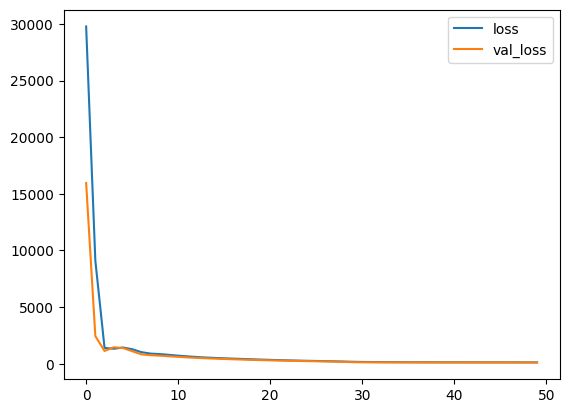

In [12]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()

## 모델 평가

In [13]:
# 모델 평가
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 115.2551 - mse: 115.2551


[115.25514221191406, 115.25514221191406]

In [14]:
# 값 예측
model.predict(X_test)[0]

9/9 [==============================] - 0s 2ms/step


array([59.787796], dtype=float32)

In [15]:
y_test.iloc[0]

52.91